<a href="https://colab.research.google.com/github/Baeltor/PCD/blob/prog/NotebooksMLII/Time_series_and_machine_learning_airline_passengers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from statsmodels.tsa.seasonal import seasonal_decompose

# Series de tiempo y aprendizaje de máquina

* Convertir un problema de series de tiempo univariado en un problema de aprendizaje supervisado

$$ y = [y_t, y_{t-1}, … ] $$

$$ X = [(y_{t-1}, y_{t-2}, …, y_{t-n}), (y_{t-2}, y_{t-3}, …, y_{t-n+1}), …, (y_{t-3}, y_{t-4}, …, y_{t-n+2})] $$

In [5]:
ts = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/refs/heads/master/airline-passengers.csv', index_col = 0, parse_dates = True)

In [6]:
df = pd. DataFrame()
df['t'] = ts['Passengers']
df['t-1'] = df['t'].shift(1)
df['t-2'] = df['t'].shift(2)

df = df.dropna()
#df.reset_index(inplace=True)

In [ ]:
df

,t,t-1,t-2
Month,,,
1949-03-01,132,118.0,112.0
1949-04-01,129,132.0,118.0
1949-05-01,121,129.0,132.0
1949-06-01,135,121.0,129.0
1949-07-01,148,135.0,121.0
...,...,...,...
1960-08-01,606,622.0,535.0
1960-09-01,508,606.0,622.0
1960-10-01,461,508.0,606.0


In [7]:
X = df[['t-1', 't-2']]
y = df['t']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

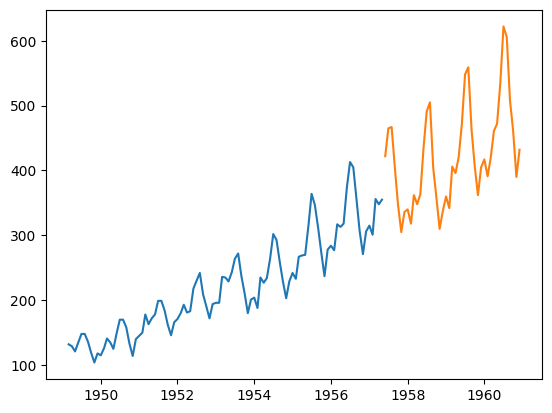

In [9]:
plt.plot(y_train)
plt.plot(y_test)

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
y_train_predicted = model.predict(X_train)

<function matplotlib.pyplot.show(close=None, block=None)>

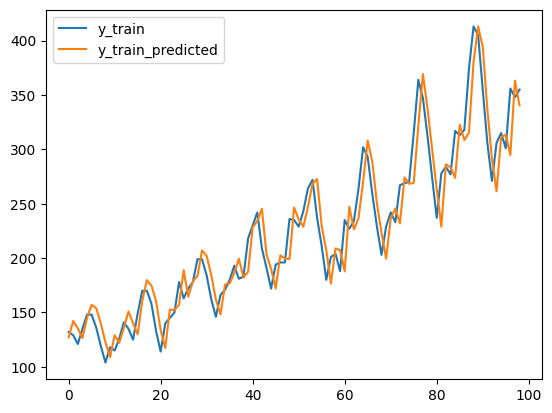

In [12]:
plt.plot(y_train.values, label = 'y_train')
plt.plot(y_train_predicted, label = 'y_train_predicted')
plt.legend()
plt.show

In [13]:
print('RMSE: ', np.sqrt(mean_squared_error(y_train.values, y_train_predicted)))
print('coefficient of determination $R^2$: ', r2_score(y_train.values, y_train_predicted))

RMSE:  22.575042285403097
coefficient of determination $R^2$:  0.9068182830771399


In [15]:
train_residuals = y_train - y_train_predicted

<function matplotlib.pyplot.show(close=None, block=None)>

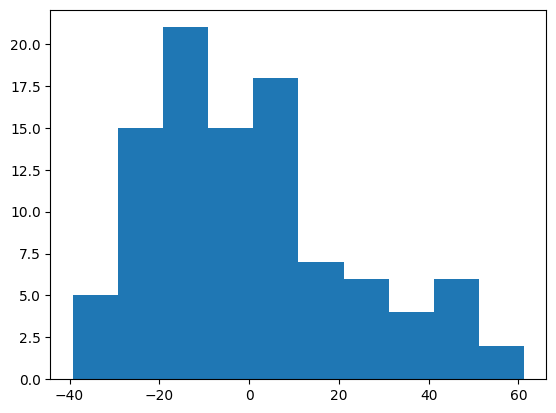

In [16]:
plt.hist(train_residuals)
plt.show

In [17]:
train_residuals.describe()

,t
count,9.900000e+01
mean,6.014493e-14
std,2.268993e+01
min,-3.922546e+01
25%,-1.796425e+01
50%,-4.923708e+00
75%,1.184530e+01
max,6.123185e+01


In [18]:
y_test_predicted = model.predict(X_test)

<function matplotlib.pyplot.show(close=None, block=None)>

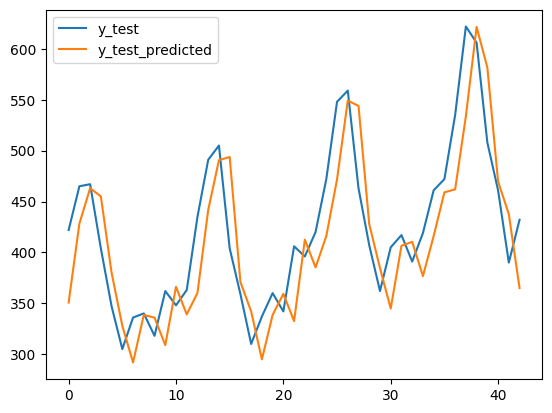

In [19]:
plt.plot(y_test.values, label = 'y_test')
plt.plot(y_test_predicted, label = 'y_test_predicted')
plt.legend()
plt.show

In [20]:
print('RMSE (test): ', np.sqrt(mean_squared_error(y_test.values, y_test_predicted)))
print('coefficient of determination $R^2$ (test): ', r2_score(y_test.values, y_test_predicted))

RMSE (test):  46.70556394329449
coefficient of determination $R^2$ (test):  0.6287656976635325


In [21]:
test_residuals = y_test - y_test_predicted

<function matplotlib.pyplot.show(close=None, block=None)>

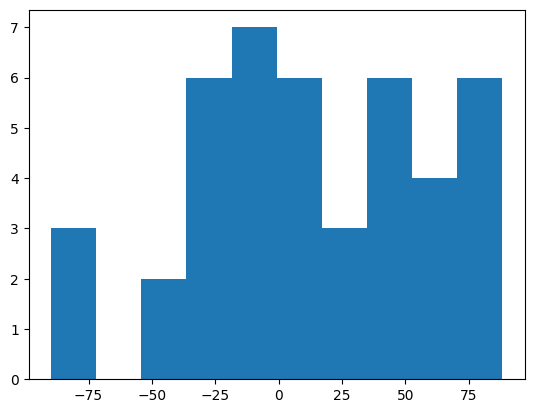

In [22]:
plt.hist(test_residuals)
plt.show

In [23]:
test_residuals.describe()

,t
count,43.000000
mean,11.319936
std,45.849276
min,-89.754071
25%,-18.759812
50%,10.530806
75%,47.115954
max,88.208245


<function matplotlib.pyplot.show(close=None, block=None)>

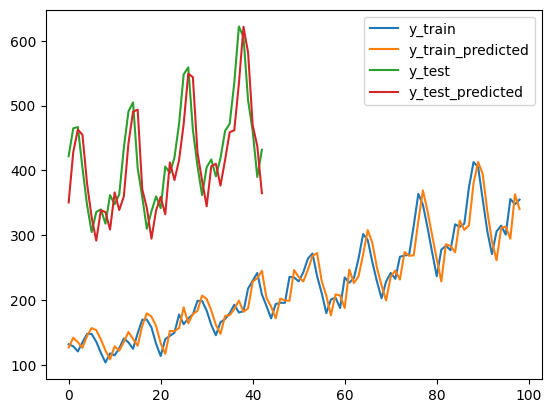

In [24]:
plt.plot(y_train.values, label = 'y_train')
plt.plot(y_train_predicted, label = 'y_train_predicted')
plt.plot(y_test.values, label = 'y_test')
plt.plot(y_test_predicted, label = 'y_test_predicted')
plt.legend()
plt.show

- Realizar más rezagos
- TreeRegressor, KNNRegressor, SVMRegressor

## Regresión lineal con mayor número de regresores

In [25]:
df = pd. DataFrame()
for i in range(13):
    df[f't-{str(i)}'] = ts['Passengers'].shift(i)

df = df.dropna()

In [26]:
df.dropna()

,t-0,t-1,t-2,t-3,t-4,t-5,t-6,t-7,t-8,t-9,t-10,t-11,t-12
Month,,,,,,,,,,,,,
1950-01-01,115,118.0,104.0,119.0,136.0,148.0,148.0,135.0,121.0,129.0,132.0,118.0,112.0
1950-02-01,126,115.0,118.0,104.0,119.0,136.0,148.0,148.0,135.0,121.0,129.0,132.0,118.0
1950-03-01,141,126.0,115.0,118.0,104.0,119.0,136.0,148.0,148.0,135.0,121.0,129.0,132.0
1950-04-01,135,141.0,126.0,115.0,118.0,104.0,119.0,136.0,148.0,148.0,135.0,121.0,129.0
1950-05-01,125,135.0,141.0,126.0,115.0,118.0,104.0,119.0,136.0,148.0,148.0,135.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1960-08-01,606,622.0,535.0,472.0,461.0,419.0,391.0,417.0,405.0,362.0,407.0,463.0,559.0
1960-09-01,508,606.0,622.0,535.0,472.0,461.0,419.0,391.0,417.0,405.0,362.0,407.0,463.0
1960-10-01,461,508.0,606.0,622.0,535.0,472.0,461.0,419.0,391.0,417.0,405.0,362.0,407.0


In [27]:
X = df.drop(columns={'t-0'})
y = df['t-0']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

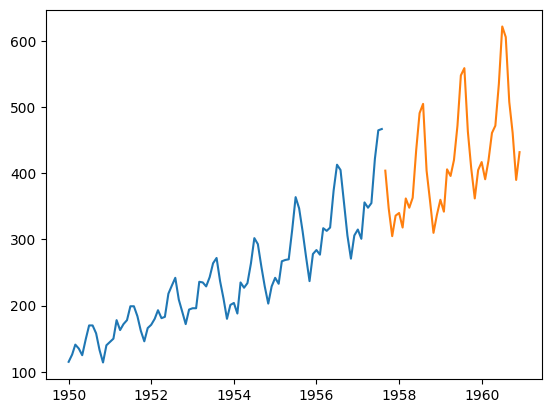

In [29]:
plt.plot(y_train)
plt.plot(y_test)

In [30]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [31]:
y_train_predicted = model.predict(X_train)

<function matplotlib.pyplot.show(close=None, block=None)>

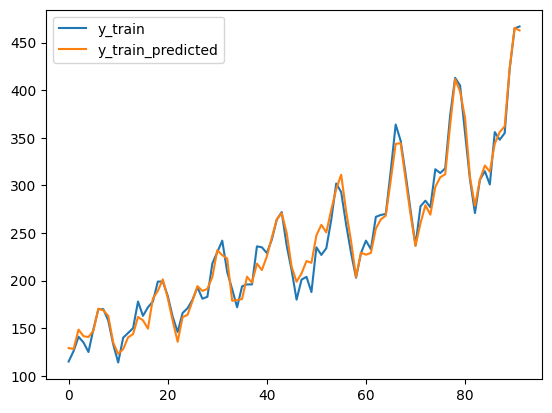

In [32]:
plt.plot(y_train.values, label = 'y_train')
plt.plot(y_train_predicted, label = 'y_train_predicted')
plt.legend()
plt.show

In [33]:
print('RMSE: ', np.sqrt(mean_squared_error(y_train.values, y_train_predicted)))
print('coefficient of determination $R^2$: ', r2_score(y_train.values, y_train_predicted))

RMSE:  10.90108718392569
coefficient of determination $R^2$:  0.9812941680127852


In [34]:
train_residuals = y_train - y_train_predicted

<function matplotlib.pyplot.show(close=None, block=None)>

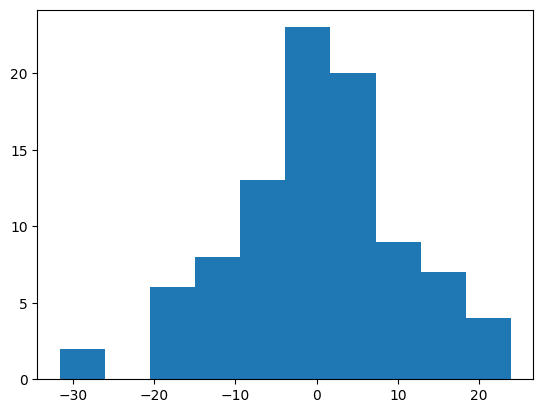

In [35]:
plt.hist(train_residuals)
plt.show

In [36]:
train_residuals.describe()

,t-0
count,9.200000e+01
mean,-5.715235e-15
std,1.096082e+01
min,-3.162401e+01
25%,-7.572895e+00
50%,1.890581e-01
75%,6.210018e+00
max,2.391148e+01


In [37]:
y_test_predicted = model.predict(X_test)

<function matplotlib.pyplot.show(close=None, block=None)>

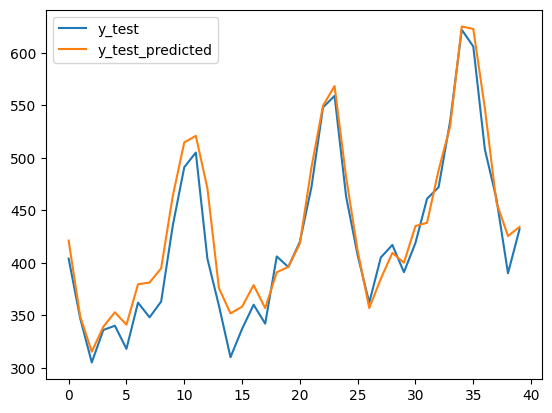

In [38]:
plt.plot(y_test.values, label = 'y_test')
plt.plot(y_test_predicted, label = 'y_test_predicted')
plt.legend()
plt.show

In [39]:
print('RMSE (test): ', np.sqrt(mean_squared_error(y_test.values, y_test_predicted)))
print('coefficient of determination $R^2$ (test): ', r2_score(y_test.values, y_test_predicted))

RMSE (test):  21.46714966779121
coefficient of determination $R^2$ (test):  0.9258857501033342


In [40]:
test_residuals = y_test - y_test_predicted

<function matplotlib.pyplot.show(close=None, block=None)>

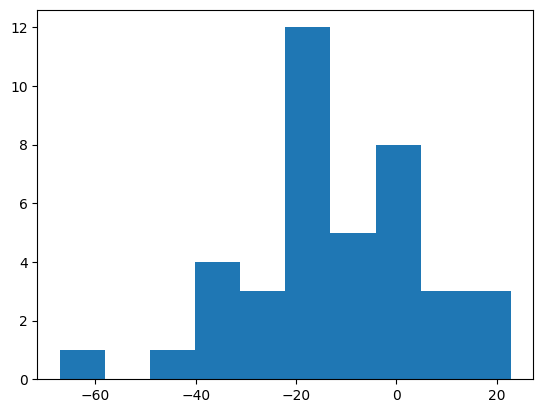

In [41]:
plt.hist(test_residuals)
plt.show

In [42]:
test_residuals.describe()

,t-0
count,40.000000
mean,-12.698661
std,17.528951
min,-67.056912
25%,-19.413522
50%,-15.340499
75%,-1.745916
max,22.841281


<function matplotlib.pyplot.show(close=None, block=None)>

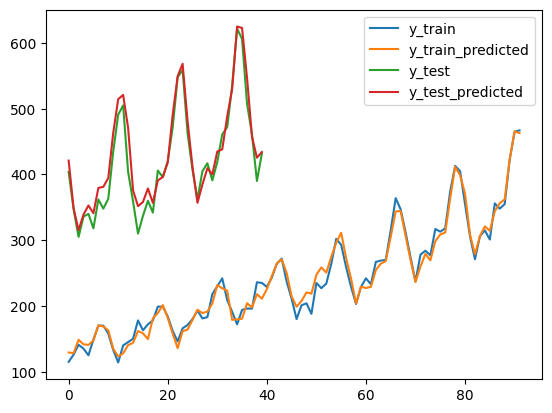

In [43]:
plt.plot(y_train.values, label = 'y_train')
plt.plot(y_train_predicted, label = 'y_train_predicted')
plt.plot(y_test.values, label = 'y_test')
plt.plot(y_test_predicted, label = 'y_test_predicted')
plt.legend()
plt.show

### Arboles de desición

In [44]:
df = pd. DataFrame()
df['t'] = ts['Passengers']
df['t-1'] = df['t'].shift(1)
df['t-2'] = df['t'].shift(2)

df = df.dropna()

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

In [46]:
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [47]:
y_train_predicted_tree = regr_1.predict(X_train)

<function matplotlib.pyplot.show(close=None, block=None)>

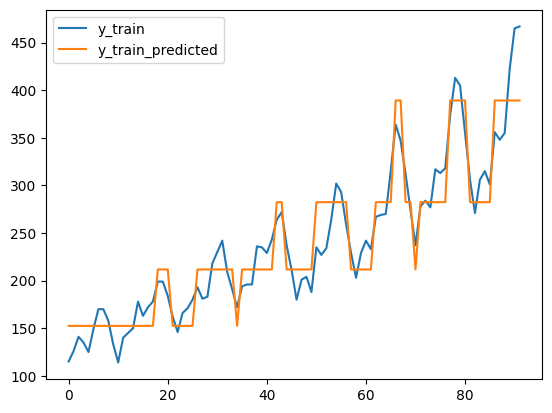

In [48]:
plt.plot(y_train.values, label = 'y_train')
plt.plot(y_train_predicted_tree, label = 'y_train_predicted')
plt.legend()
plt.show

In [49]:
print('RMSE: ', np.sqrt(mean_squared_error(y_train.values, y_train_predicted_tree)))
print('coefficient of determination $R^2$: ', r2_score(y_train.values, y_train_predicted_tree))

RMSE:  26.06272141055908
coefficient of determination $R^2$:  0.8930755741779439


In [50]:
y_train_predicted_tree = regr_2.predict(X_train)

<function matplotlib.pyplot.show(close=None, block=None)>

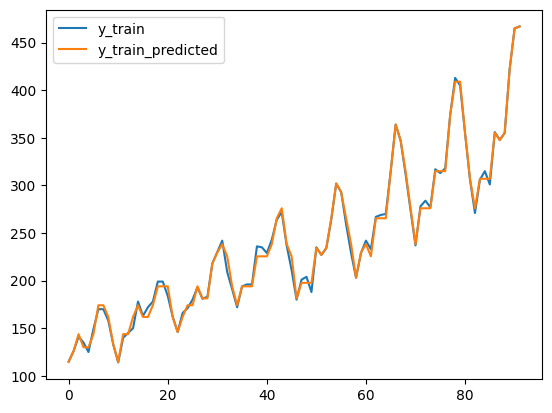

In [51]:
plt.plot(y_train.values, label = 'y_train')
plt.plot(y_train_predicted_tree, label = 'y_train_predicted')
plt.legend()
plt.show

In [52]:
print('RMSE: ', np.sqrt(mean_squared_error(y_train.values, y_train_predicted_tree)))
print('coefficient of determination $R^2$: ', r2_score(y_train.values, y_train_predicted_tree))

RMSE:  4.728238261767421
coefficient of determination $R^2$:  0.9964808635260303


In [53]:
train_residuals = y_train - y_train_predicted_tree

<function matplotlib.pyplot.show(close=None, block=None)>

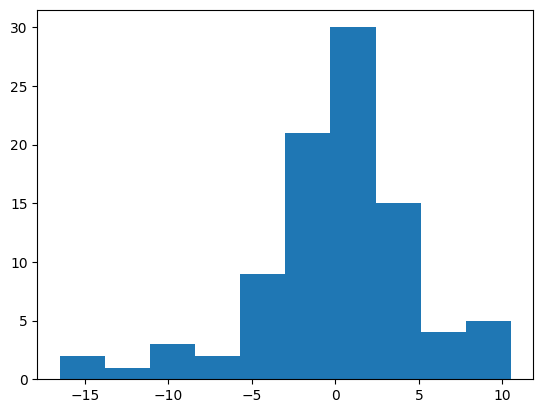

In [54]:
plt.hist(train_residuals)
plt.show

In [55]:
train_residuals.describe()

,t-0
count,9.200000e+01
mean,-3.089316e-16
std,4.754147e+00
min,-1.650000e+01
25%,-1.625000e+00
50%,0.000000e+00
75%,3.083333e+00
max,1.050000e+01


In [56]:
y_test_predicted_tree = regr_2.predict(X_test)

<function matplotlib.pyplot.show(close=None, block=None)>

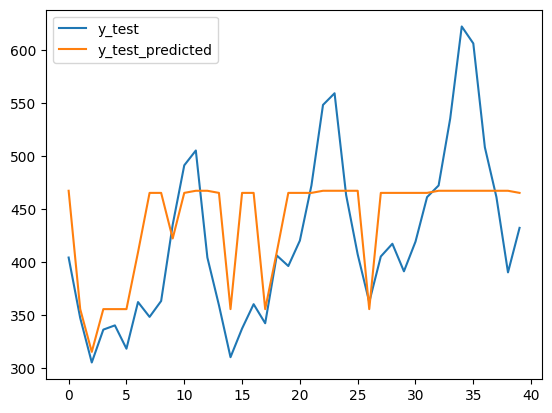

In [57]:
plt.plot(y_test.values, label = 'y_test')
plt.plot(y_test_predicted_tree, label = 'y_test_predicted')
plt.legend()
plt.show

In [58]:
print('RMSE (test): ', np.sqrt(mean_squared_error(y_test.values, y_test_predicted_tree)))
print('coefficient of determination $R^2$ (test): ', r2_score(y_test.values, y_test_predicted_tree))

RMSE (test):  66.20997742871621
coefficient of determination $R^2$ (test):  0.2949826110447039


In [59]:
test_residuals = y_test - y_test_predicted

<function matplotlib.pyplot.show(close=None, block=None)>

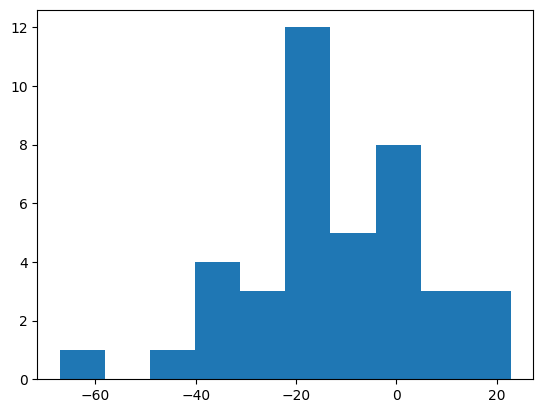

In [60]:
plt.hist(test_residuals)
plt.show

In [61]:
test_residuals.describe()

,t-0
count,40.000000
mean,-12.698661
std,17.528951
min,-67.056912
25%,-19.413522
50%,-15.340499
75%,-1.745916
max,22.841281


<function matplotlib.pyplot.show(close=None, block=None)>

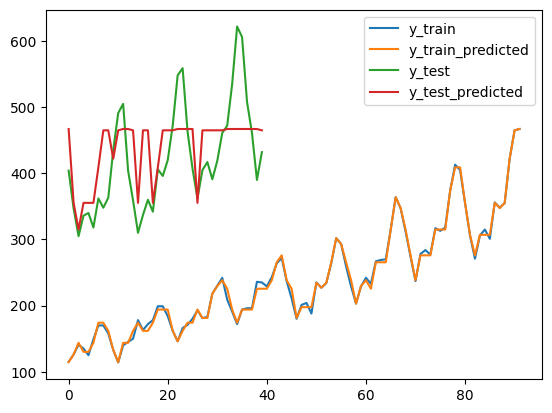

In [62]:
plt.plot(y_train.values, label = 'y_train')
plt.plot(y_train_predicted_tree, label = 'y_train_predicted')
plt.plot(y_test.values, label = 'y_test')
plt.plot(y_test_predicted_tree, label = 'y_test_predicted')
plt.legend()
plt.show

### Maquinas de soporte vectorial

In [63]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

In [65]:
svr_model = make_pipeline(StandardScaler(), SVR( kernel = 'linear', C = 12.0, epsilon=0.01))
svr_model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=12.0, epsilon=0.01, kernel='linear'))])

In [66]:
y_train_predicted_svr = svr_model.predict(X_train)

<function matplotlib.pyplot.show(close=None, block=None)>

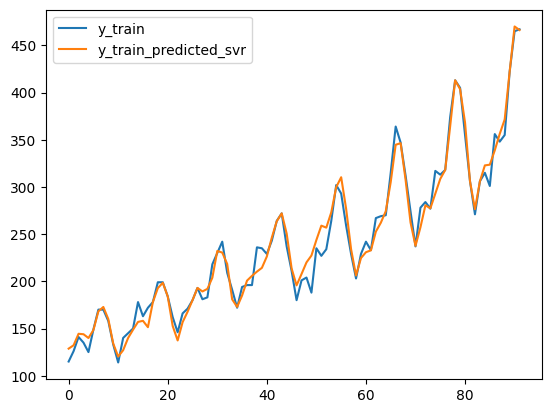

In [67]:
plt.plot(y_train.values, label = 'y_train')
plt.plot(y_train_predicted_svr, label = 'y_train_predicted_svr')
plt.legend()
plt.show

In [68]:
print('RMSE: ', np.sqrt(mean_squared_error(y_train.values, y_train_predicted_svr)))
print('coefficient of determination $R^2$: ', r2_score(y_train.values, y_train_predicted_svr))

RMSE:  11.53180581371406
coefficient of determination $R^2$:  0.9790669724784888


In [69]:
train_residuals = y_train - y_train_predicted_svr

<function matplotlib.pyplot.show(close=None, block=None)>

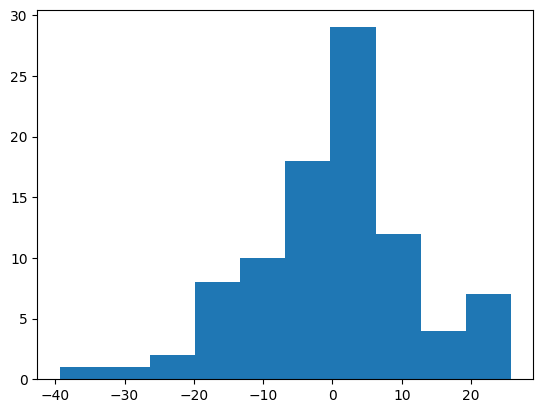

In [70]:
plt.hist(train_residuals)
plt.show

In [71]:
train_residuals.describe()

,t-0
count,92.000000
mean,-0.365641
std,11.589164
min,-39.328455
25%,-6.378652
50%,0.000144
75%,5.343839
max,25.729747


In [72]:
y_test_predicted_svr = svr_model.predict(X_test)

<function matplotlib.pyplot.show(close=None, block=None)>

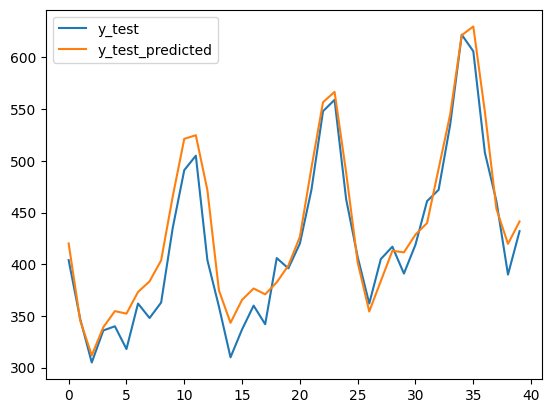

In [73]:
plt.plot(y_test.values, label = 'y_test')
plt.plot(y_test_predicted_svr, label = 'y_test_predicted')
plt.legend()
plt.show

In [74]:

print('RMSE (test): ', np.sqrt(mean_squared_error(y_test.values, y_test_predicted_svr)))
print('coefficient of determination $R^2$ (test): ', r2_score(y_test.values, y_test_predicted_svr))

RMSE (test):  23.398605301643713
coefficient of determination $R^2$ (test):  0.911949283897603


In [75]:

test_residuals = y_test - y_test_predicted

<function matplotlib.pyplot.show(close=None, block=None)>

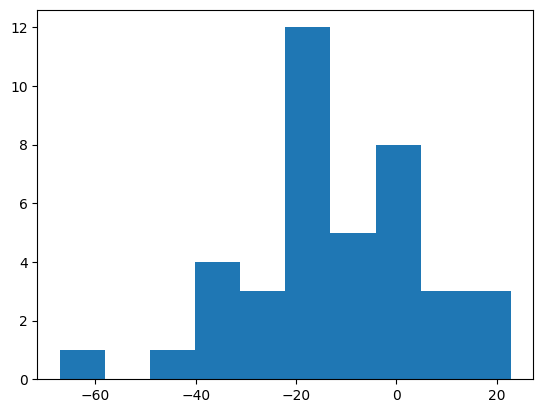

In [76]:
plt.hist(test_residuals)
plt.show

In [77]:
test_residuals.describe()

,t-0
count,40.000000
mean,-12.698661
std,17.528951
min,-67.056912
25%,-19.413522
50%,-15.340499
75%,-1.745916
max,22.841281


<function matplotlib.pyplot.show(close=None, block=None)>

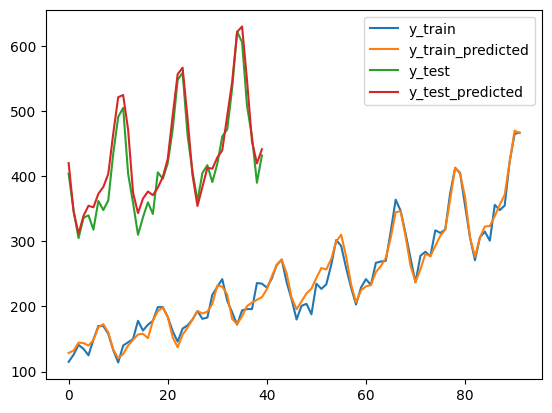

In [78]:
plt.plot(y_train.values, label = 'y_train')
plt.plot(y_train_predicted_svr, label = 'y_train_predicted')
plt.plot(y_test.values, label = 'y_test')
plt.plot(y_test_predicted_svr, label = 'y_test_predicted')
plt.legend()
plt.show

### KNN - Regressor

In [ ]:
neigh = KNeighborsRegressor(n_neighbors=5, weights='distance')
neigh.fit(X_train, y_train)

KNeighborsRegressor(weights='distance')

In [ ]:
y_train_predicted_knn = neigh.predict(X_train)

<function matplotlib.pyplot.show(close=None, block=None)>

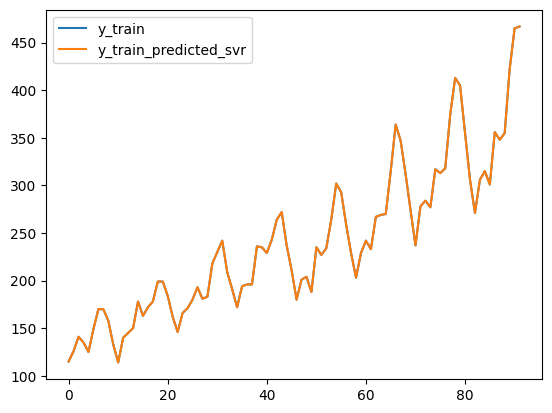

In [ ]:
plt.plot(y_train.values, label = 'y_train')
plt.plot(y_train_predicted_knn, label = 'y_train_predicted_svr')
plt.legend()
plt.show

In [ ]:
print('RMSE: ', np.sqrt(mean_squared_error(y_train.values, y_train_predicted_knn)))
print('coefficient of determination $R^2$: ', r2_score(y_train.values, y_train_predicted_knn))

RMSE:  0.0
coefficient of determination $R^2$:  1.0


In [ ]:
train_residuals = y_train - y_train_predicted_knn

<function matplotlib.pyplot.show(close=None, block=None)>

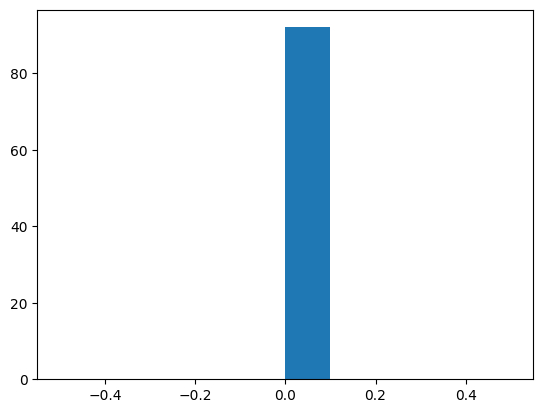

In [ ]:
plt.hist(train_residuals)
plt.show

In [ ]:
train_residuals.describe()

count    92.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
Name: t-0, dtype: float64

In [ ]:
y_test_predicted_knn = neigh.predict(X_test)

<function matplotlib.pyplot.show(close=None, block=None)>

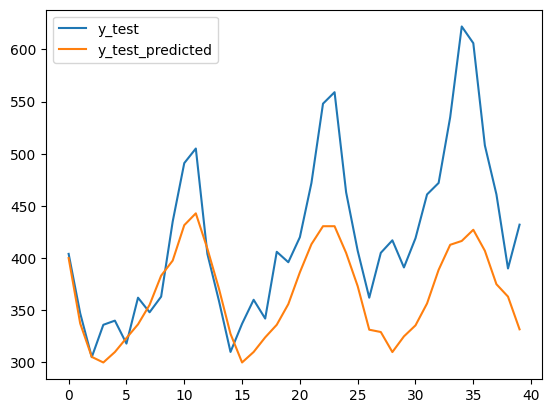

In [ ]:
plt.plot(y_test.values, label = 'y_test')
plt.plot(y_test_predicted_knn, label = 'y_test_predicted')
plt.legend()
plt.show

In [ ]:
print('RMSE (test): ', np.sqrt(mean_squared_error(y_test.values, y_test_predicted_knn)))
print('coefficient of determination $R^2$ (test): ', r2_score(y_test.values, y_test_predicted_knn))

RMSE (test):  75.47808061856307
coefficient of determination $R^2$ (test):  0.0837908081626123


In [ ]:
test_residuals = y_test - y_test_predicted

<function matplotlib.pyplot.show(close=None, block=None)>

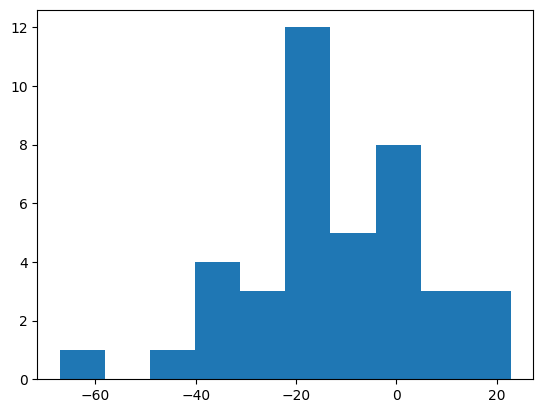

In [ ]:
plt.hist(test_residuals)
plt.show

In [ ]:
test_residuals.describe()

count    40.000000
mean    -12.698661
std      17.528951
min     -67.056912
25%     -19.413522
50%     -15.340499
75%      -1.745916
max      22.841281
Name: t-0, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

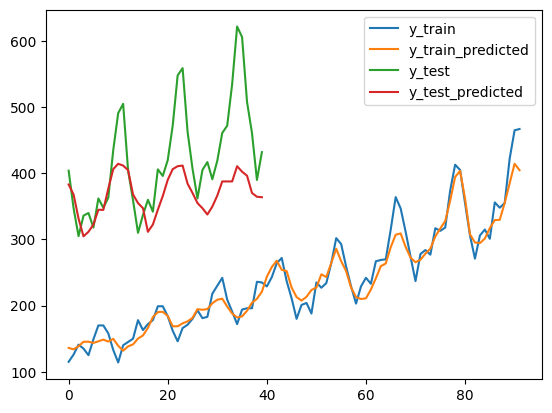

In [ ]:
plt.plot(y_train.values, label = 'y_train')
plt.plot(y_train_predicted_knn, label = 'y_train_predicted')
plt.plot(y_test.values, label = 'y_test')
plt.plot(y_test_predicted_knn, label = 'y_test_predicted')
plt.legend()
plt.show